In [13]:
%pip install pandas numpy matplotlib seaborn scipy scikit-learn

import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast


%matplotlib inline


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
df_cotes = pd.read_csv("data/09122024_merged.csv")
df_cotes['course_heureDepart'] = pd.to_datetime(df_cotes['course_heureDepart'], unit='ms')
df_cotes['participant_dateRapport'] = pd.to_datetime(df_cotes['participant_dateRapport'], unit='ms')

df_result = pd.read_csv("data/09122024_results.csv")
df_result["resultats"] = df_result["resultats"].apply(ast.literal_eval)

display(df_cotes.info())
display(df_result.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51551 entries, 0 to 51550
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   programme_date                        51544 non-null  float64       
 1   reunion_num                           51544 non-null  float64       
 2   course_num                            51544 non-null  float64       
 3   course_heureDepart                    51544 non-null  datetime64[ns]
 4   course_specialite                     51544 non-null  object        
 5   participant_num                       51544 non-null  float64       
 6   participant_nom                       51544 non-null  object        
 7   participant_dateRapport               51544 non-null  datetime64[ns]
 8   participant_rapport                   51544 non-null  float64       
 9   participant_indicateurTendance        51544 non-null  object        
 10

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   programme_date  36 non-null     int64 
 1   reunion_num     36 non-null     int64 
 2   course_num      36 non-null     int64 
 3   resultats       36 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.3+ KB


None

In [ ]:
merged_df = pd.merge(df_cotes, df_result, on=["programme_date", "reunion_num", "course_num"])
merged_df["time_to_race"] = merged_df.apply(
    lambda row: (row["course_heureDepart"] - row["participant_dateRapport"]),
    axis=1,
)
merged_df["rank"] = merged_df.apply(
    lambda row: row["resultats"].index(row["participant_num"]) + 1
    if row["participant_num"] in row["resultats"]
    else np.nan,
    axis=1,
)

display(merged_df.head())
display(set(merged_df["time_to_race"]))

,programme_date,reunion_num,course_num,course_heureDepart,course_specialite,participant_num,participant_nom,participant_dateRapport,participant_rapport,participant_indicateurTendance,participant_nombreIndicateurTendance,resultats,time_to_race,rank
0,9122024.0,1.0,1.0,2024-12-09 11:35:00,OBSTACLE,1.0,SALAMALEK,2024-12-09 04:00:07,3.1,,0.0,"[9, 6, 2, 1, 3, 4]",-1 days +16:25:07,4.0
1,9122024.0,1.0,1.0,2024-12-09 11:35:00,OBSTACLE,3.0,JOJO JUNIOR,2024-12-09 04:00:07,8.3,,0.0,"[9, 6, 2, 1, 3, 4]",-1 days +16:25:07,5.0
2,9122024.0,1.0,1.0,2024-12-09 11:35:00,OBSTACLE,4.0,LE TUNISIEN,2024-12-09 04:00:07,6.2,,0.0,"[9, 6, 2, 1, 3, 4]",-1 days +16:25:07,6.0
3,9122024.0,1.0,1.0,2024-12-09 11:35:00,OBSTACLE,5.0,SOROWEN,2024-12-09 04:00:07,24.0,,0.0,"[9, 6, 2, 1, 3, 4]",-1 days +16:25:07,NaN
4,9122024.0,1.0,1.0,2024-12-09 11:35:00,OBSTACLE,6.0,VITUS BERING,2024-12-09 04:00:07,2.7,,0.0,"[9, 6, 2, 1, 3, 4]",-1 days +16:25:07,2.0


{Timedelta('-1 days +05:45:07'),
 Timedelta('-1 days +06:00:07'),
 Timedelta('-1 days +06:15:07'),
 Timedelta('-1 days +06:30:07'),
 Timedelta('-1 days +06:45:07'),
 Timedelta('-1 days +07:00:07'),
 Timedelta('-1 days +07:15:07'),
 Timedelta('-1 days +07:30:07'),
 Timedelta('-1 days +07:45:07'),
 Timedelta('-1 days +08:00:07'),
 Timedelta('-1 days +08:15:07'),
 Timedelta('-1 days +08:29:07'),
 Timedelta('-1 days +08:30:07'),
 Timedelta('-1 days +08:30:08'),
 Timedelta('-1 days +08:44:07'),
 Timedelta('-1 days +08:45:07'),
 Timedelta('-1 days +08:59:07'),
 Timedelta('-1 days +09:00:07'),
 Timedelta('-1 days +09:01:07'),
 Timedelta('-1 days +09:14:07'),
 Timedelta('-1 days +09:15:07'),
 Timedelta('-1 days +09:16:07'),
 Timedelta('-1 days +09:17:07'),
 Timedelta('-1 days +09:29:07'),
 Timedelta('-1 days +09:30:07'),
 Timedelta('-1 days +09:31:07'),
 Timedelta('-1 days +09:32:07'),
 Timedelta('-1 days +09:33:07'),
 Timedelta('-1 days +09:44:07'),
 Timedelta('-1 days +09:45:07'),
 Timedelta

,rank,time_to_race,mean_participant_rapport
0,1.0,-1 days +06:45:07,1.7
1,1.0,-1 days +07:00:07,1.7
2,1.0,-1 days +07:15:07,1.7
3,1.0,-1 days +07:30:07,1.7
4,1.0,-1 days +07:45:07,1.7


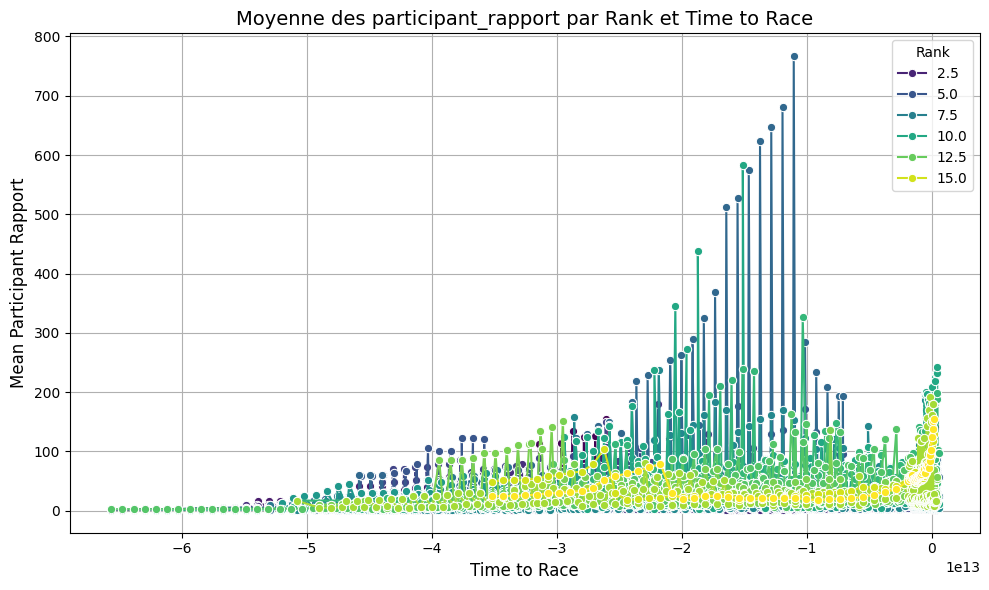

In [29]:
result = (
    merged_df.groupby(['rank', 'time_to_race'])['participant_rapport']
    .mean()
    .reset_index()
    .rename(columns={'participant_rapport': 'mean_participant_rapport'})
)
display(result.head())
# Création du graphique avec Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=result,
    x='time_to_race',
    y='mean_participant_rapport',
    hue='rank',
    marker='o',
    palette='viridis'
)

# Configuration du graphique
plt.title('Moyenne des participant_rapport par Rank et Time to Race', fontsize=14)
plt.xlabel('Time to Race', fontsize=12)
plt.ylabel('Mean Participant Rapport', fontsize=12)
plt.legend(title='Rank', fontsize=10)
plt.grid(True)
plt.tight_layout()

# Affichage
plt.show()